In [21]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("colorado_motor_vehicle_sales.csv")

In [4]:
df

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000
...,...,...,...,...
496,2015,4,Larimer,244327000
497,2015,4,Mesa,88202000
498,2015,4,Pueblo,94606000
499,2015,4,Rest of State,157059000


In [6]:
df.columns

Index(['year', 'quarter', 'county', 'sales'], dtype='object')

In [11]:
df.dtypes

year        int64
quarter     int64
county     object
sales       int64
dtype: object

In [14]:
df.isnull().sum()

year       0
quarter    0
county     0
sales      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

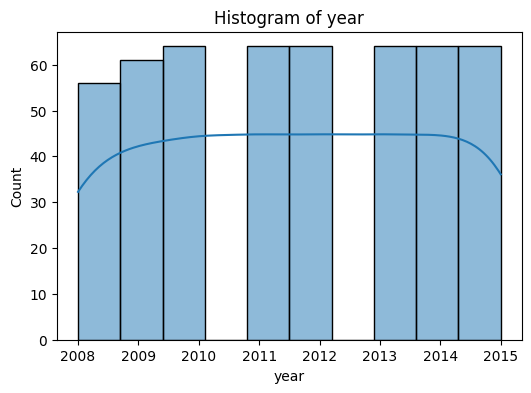

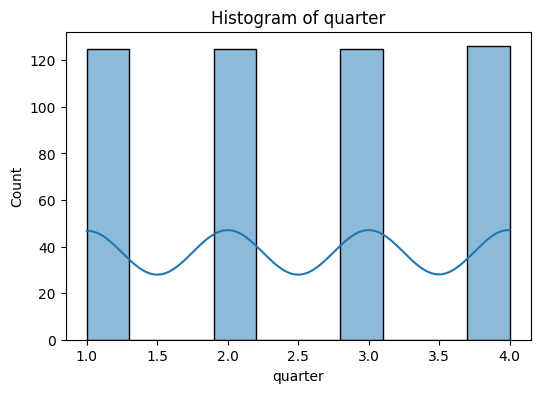

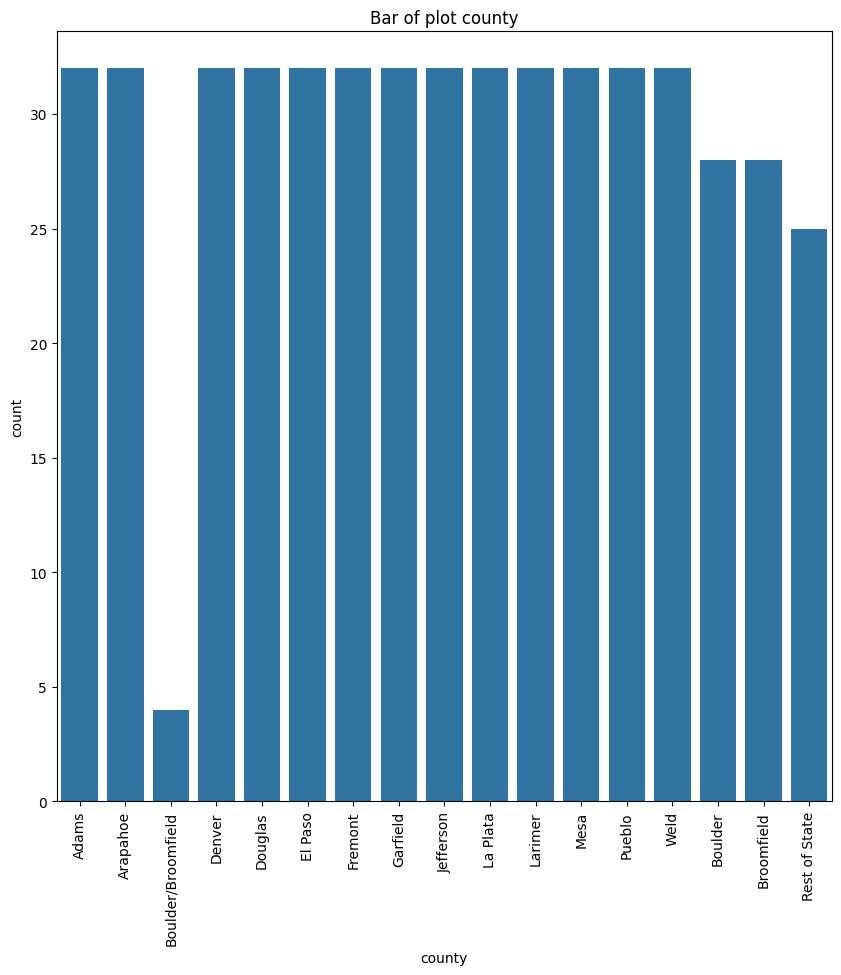

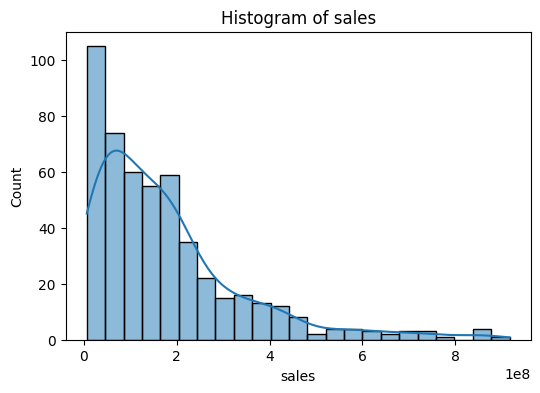

In [33]:
import seaborn as sns 
for column in df.columns:
# Check if the column is numeric
 if pd.api.types.is_numeric_dtype(df[column]):
# Plot a histogram
  plt.figure(figsize=(6, 4))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f"Histogram of {column}")
  plt.show()
 elif df[column].dtypes=="object":
  plt.figure(figsize=(10,10))
  sns.countplot(data=df, x=column)
  plt.title(f"Bar of plot {column}")
  plt.xticks(rotation=90)
  plt.show()

In [34]:
df.describe()

,year,quarter,sales
count,501.000000,501.000000,5.010000e+02
mean,2011.570858,2.502994,1.760585e+08
std,2.266599,1.120041,1.642055e+08
min,2008.000000,1.000000,6.274000e+06
25%,2010.000000,2.000000,6.148200e+07
50%,2012.000000,3.000000,1.385820e+08
75%,2014.000000,4.000000,2.241580e+08
max,2015.000000,4.000000,9.169100e+08


In [35]:
df

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000
...,...,...,...,...
496,2015,4,Larimer,244327000
497,2015,4,Mesa,88202000
498,2015,4,Pueblo,94606000
499,2015,4,Rest of State,157059000


In [38]:
#creating a new column for year and queater
df["period"]=df["year"].astype(str) +"Q"+df["quarter"].astype(str)

In [39]:
df

,year,quarter,county,sales,period
0,2008,1,Adams,231609000,2008Q1
1,2008,1,Arapahoe,550378000,2008Q1
2,2008,1,Boulder/Broomfield,176771000,2008Q1
3,2008,1,Denver,200103000,2008Q1
4,2008,1,Douglas,93259000,2008Q1
...,...,...,...,...,...
496,2015,4,Larimer,244327000,2015Q4
497,2015,4,Mesa,88202000,2015Q4
498,2015,4,Pueblo,94606000,2015Q4
499,2015,4,Rest of State,157059000,2015Q4


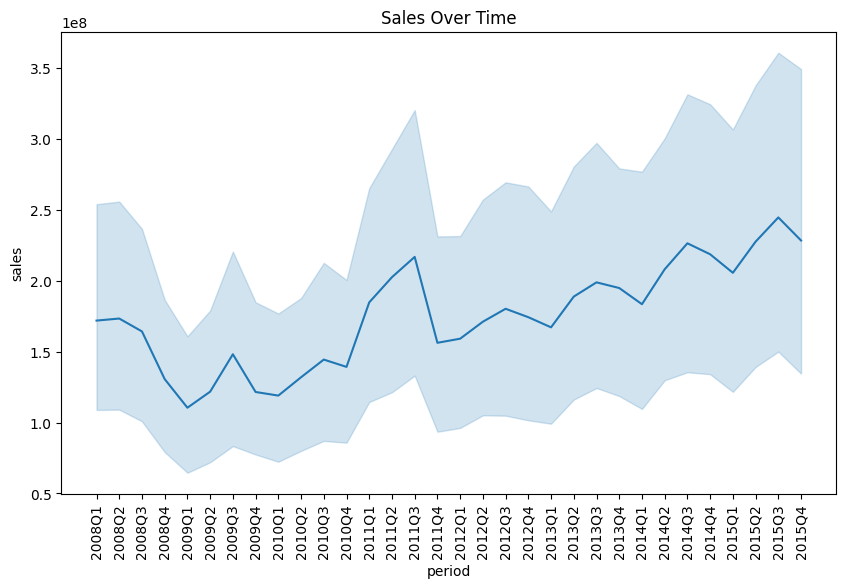

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='period', y='sales')
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.show()

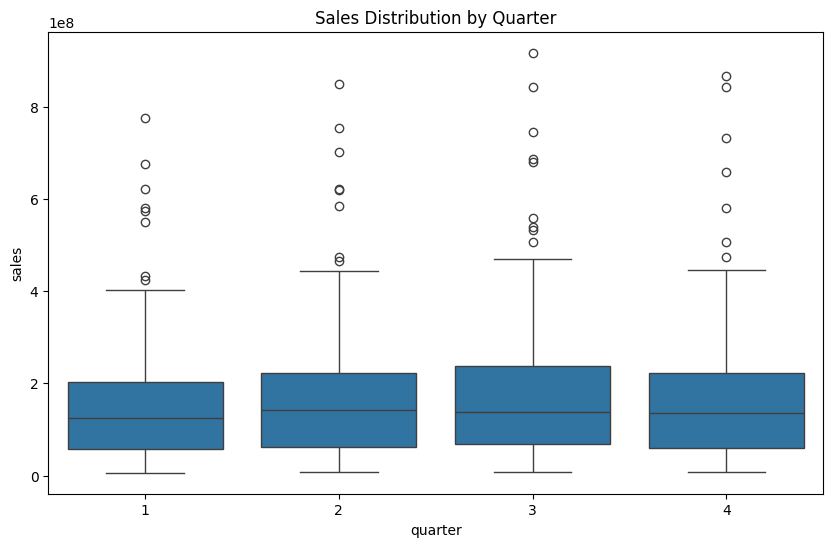

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quarter', y='sales')
plt.title('Sales Distribution by Quarter')
plt.show()

In [63]:
total_sales_by_county = df.groupby(["quarter", "county"])["sales"].sum().reset_index()
print(total_sales_by_county)

    quarter              county       sales
0         1               Adams  2051028000
1         1            Arapahoe  4565333000
2         1             Boulder  1079526000
3         1  Boulder/Broomfield   176771000
4         1          Broomfield   227261000
..      ...                 ...         ...
63        4             Larimer  1326149000
64        4                Mesa   586191000
65        4              Pueblo   558976000
66        4       Rest of State   956211000
67        4                Weld  1187510000

[68 rows x 3 columns]


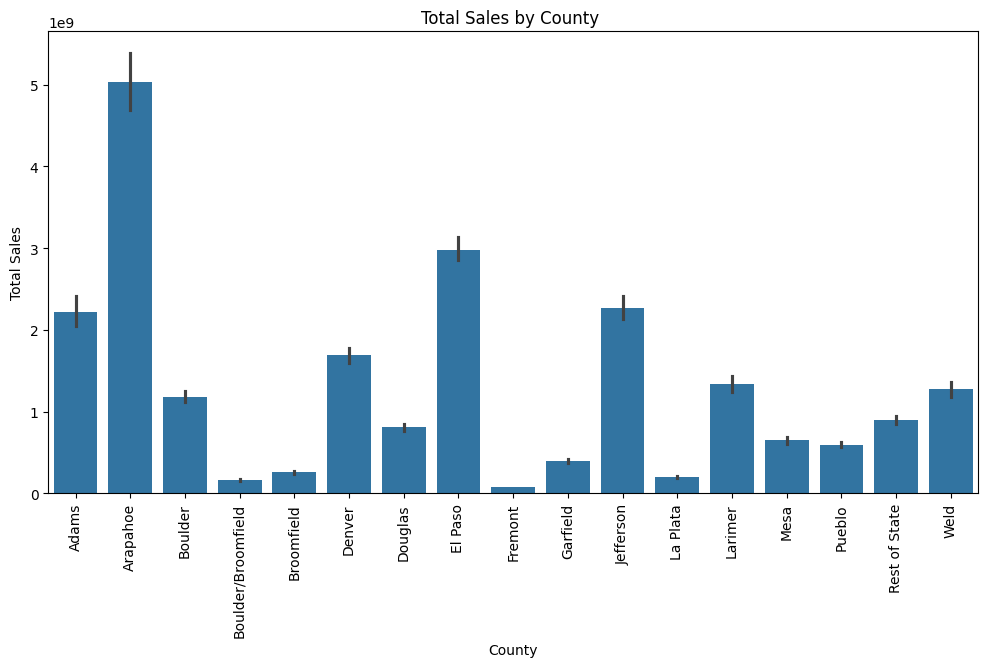

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_county, x='county',y='sales')
plt.title('Total Sales by County ')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.xlabel('County')
plt.show()

In [80]:
q1_sales = df[df["quarter"] == 1].groupby("county", as_index=False)["sales"].sum()
print(q1_sales)

                county       sales
0                Adams  2051028000
1             Arapahoe  4565333000
2              Boulder  1079526000
3   Boulder/Broomfield   176771000
4           Broomfield   227261000
5               Denver  1602969000
6              Douglas   732997000
7              El Paso  2797449000
8              Fremont    73325000
9             Garfield   360709000
10           Jefferson  2081973000
11            La Plata   179474000
12             Larimer  1216177000
13                Mesa   661728000
14              Pueblo   575042000
15       Rest of State   810599000
16                Weld  1184485000


Text(0.5, 1.0, 'Sales by County in qaurter 1')

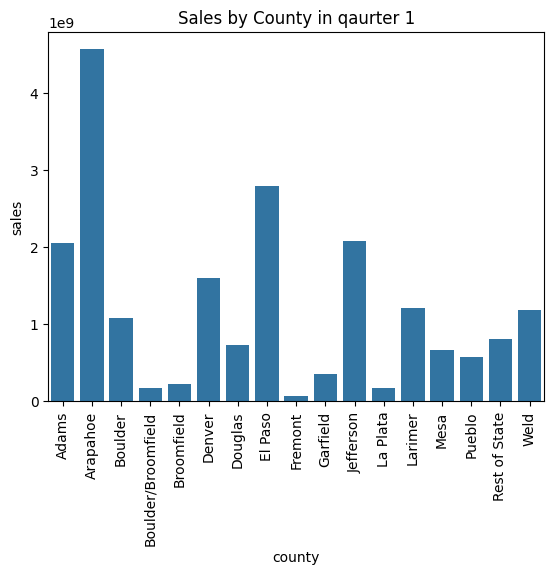

In [87]:
sns.barplot(data=q1_sales, x="county",y="sales")
plt.xticks(rotation=90)
plt.title("Sales by County in qaurter 1")